In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bnpc-a-gold-standard-bangla-paraphrase-corpus/BnPC_val.csv
/kaggle/input/bnpc-a-gold-standard-bangla-paraphrase-corpus/BnPC_train.csv
/kaggle/input/bnpc-a-gold-standard-bangla-paraphrase-corpus/BnPC_test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Libraries and Load Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/kaggle/input/bnpc-a-gold-standard-bangla-paraphrase-corpus/BnPC_train.csv')
print(data.head())

                                     sentence1  \
0  ফেসবুকে অস্ত্র হাতে ছবি, আলোচনায় এমপি বাবলু   
1  ফেসবুকে অস্ত্র হাতে ছবি, আলোচনায় এমপি বাবলু   
2  ফেসবুকে অস্ত্র হাতে ছবি, আলোচনায় এমপি বাবলু   
3                 এমপি বাবলুর ফেসবুকে নগ্ন ছবি   
4                 এমপি বাবলুর ফেসবুকে নগ্ন ছবি   

                                        sentence2  label  
0                    এমপি বাবলুর ফেসবুকে নগ্ন ছবি      0  
1          ফেসবুকে পিস্তল হাতে বগুড়ার এমপি বাবলু      1  
2     অস্ত্রের পর এবার নগ্ন ছবি সেই এমপির ফেসবুকে      0  
3          ফেসবুকে পিস্তল হাতে বগুড়ার এমপি বাবলু      0  
4  নতুন কেনা পিস্তল হাতে বগুড়ার এমপির ছবি ভাইরাল      0  


In [5]:
data.columns

Index(['sentence1', 'sentence2', 'label'], dtype='object')

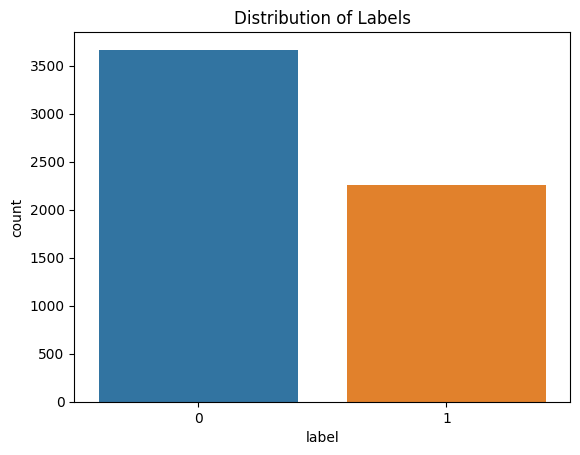

In [6]:
# Basic Data Visualization

# Show label distribution count plot
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.show()

In [7]:
# Check for null values
print("Null values in dataset:\n", data.isnull().sum())

Null values in dataset:
 sentence1    0
sentence2    0
label        0
dtype: int64


In [8]:
# Simple Text Preprocessing and Feature Preparation

# For simple beginner-friendly ML, we'll convert the sentences to TF-IDF features

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Combine sentence1 and sentence2 by joining with a separator for vectorization (simple concatenation)
data['combined'] = data['sentence1'] + " " + data['sentence2']

In [9]:
# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['combined'])

# Target variable
y = data['label']

In [10]:
# Split dataset into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a Strong ML Model (Gradient Boosting with XGBoost)

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize model with default params (good strong baseline)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [12]:
# Predict on test set
y_pred = model.predict(X_test)

# Show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       741
           1       0.77      0.63      0.69       443

    accuracy                           0.79      1184
   macro avg       0.78      0.76      0.76      1184
weighted avg       0.79      0.79      0.78      1184



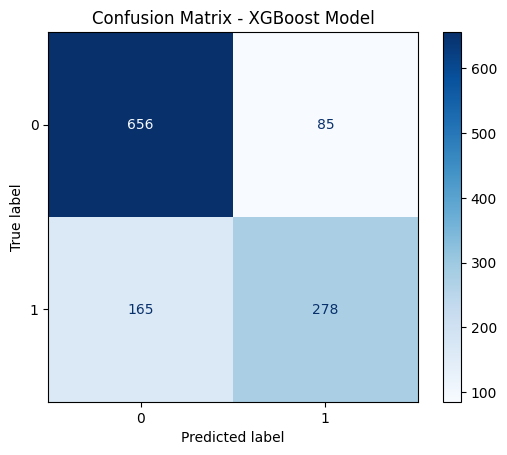

In [13]:
# Visualize Confusion Matrix for Model Evaluation

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost Model")
plt.show()